<a href="https://colab.research.google.com/github/Caory2/se-alesysistemas/blob/main/TALLER_TRANSFORMADA_Z.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

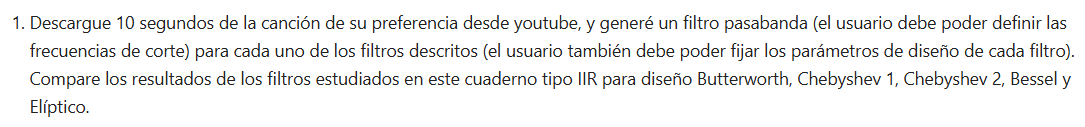

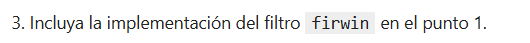

In [ ]:
! pip install yt-dlp
#!python3 -m pip install --force-reinstall https://github.com/yt-dlp/yt-dlp/archive/master.tar.gz


!pip install soundfile

# para instalar pip install soundfile

#librerias
from IPython.display import Audio
import soundfile as sf


In [ ]:
link="https://youtu.be/9CfY1xxbgSc"
!yt-dlp --extract-audio -o "audio" --audio-format mp3 {link}

!ffmpeg -i audio.mp3 out.wav
#lee archivos wav
nombre_out = "out.wav"
x, fs = sf.read(nombre_out)



[youtube] Extracting URL: https://youtu.be/9CfY1xxbgSc
[youtube] 9CfY1xxbgSc: Downloading webpage
[youtube] 9CfY1xxbgSc: Downloading tv client config
[youtube] 9CfY1xxbgSc: Downloading player 7795af42
[youtube] 9CfY1xxbgSc: Downloading tv player API JSON
[youtube] 9CfY1xxbgSc: Downloading ios player API JSON
[youtube] 9CfY1xxbgSc: Downloading m3u8 information
[info] 9CfY1xxbgSc: Downloading 1 format(s): 251
[download] Destination: audio
[download] 100% of    2.20MiB in 00:00:00 at 12.00MiB/s
[ExtractAudio] Destination: audio.mp3
Deleting original file audio (pass -k to keep)
ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray 

In [ ]:
# read speech signal from file
print('Frecuencia de muestreo %.2f[Hz]\naudio %s' % (fs,nombre_out))

x.shape[0]/fs #segundos de la canción

xpro = x.copy() #copiar archivos para procesar
ti = 30
tf = 50
xs = xpro[int(ti*fs):int((tf*fs)),:]

#Para escuchar el trozo de audio con el que se va a trabajar:
#No usar un trozo muy grande o el entorno se puede desconectar

Audio([xs[:,1], xs[:,0]],rate=fs)

Frecuencia de muestreo 48000.00[Hz]
audio out.wav


Ingrese la frecuencia de corte baja (Hz): 1
Ingrese la frecuencia de corte alta (Hz): 100
seleccione el tipo de filtro que desea para la señal:
 0.Butterworth
 1.Chebyshev 1
 2.Chebyshev 2
 3.eliptico
 4.Bessel
 5.Firwim
5


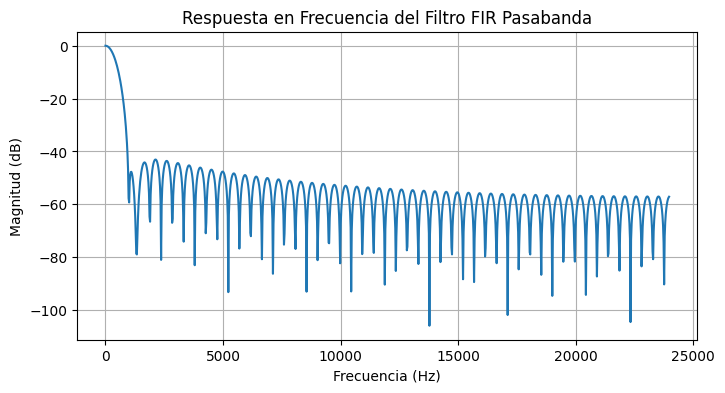

In [9]:
from scipy.signal import butter, cheby1,cheby2, ellip, bessel, firwin
from scipy.signal import freqz_zpk, freqz
import matplotlib.pyplot as plt
import numpy as np

def plot_freq_response(filter_name, w, h, N): #Mostrar la respuesta en frecuencia del filtro
  fig = plt.figure()
  ax1 = fig.add_subplot(1, 1, 1)
  ax1.set_title(filter_name +' Digital filter frequency response, order= ' + str(N))
  ax1.plot(w, 20 * np.log10(abs(h)), 'b')
  ax1.set_ylabel('Amplitude [dB]', color='b')
  ax1.set_xlabel('Frequency [Hz]')
  ax1.grid()
  ax2 = ax1.twinx()
  angles = np.unwrap(np.angle(h))
  ax2.plot(w, angles, 'g')
  ax2.set_ylabel('Angle [radians]', color='g')
  plt.axis('tight')
  plt.show()



def bandpass_filter(fs, fmin, fmax, design):
  Wn=[fmin,fmax]
  filt='bandpass'
  if design == 0:
    #butterworth
    type_f = 'Butterworth'
    N=1
    out='zpk'
    zeros, poles, gain = butter(N, Wn, btype=filt, output=out, fs=fs)
    w, h = freqz_zpk(zeros, poles, gain, fs=fs)
    plot_freq_response(type_f, w, h, N)

  elif design == 1:
    #Chebyshev 1
    type_f = 'Chebyshev 1'
    ripple = 10
    N= 4
    out='zpk'
    zeros, poles, gain = cheby1(N, rp=ripple, Wn=Wn,btype=filt, output=out, fs=fs)
    w, h = freqz_zpk(zeros, poles, gain, fs=fs)
    plot_freq_response(type_f, w, h, N)

  elif design == 2:
    #Chebyshev 2
    N = 4
    type_f = 'Chebyshev 2'
    ripple = 10
    out='ba'
    num, den = cheby2(N, rs=ripple, Wn=Wn,btype=filt, output=out, fs=fs)
    w, h = freqz(num,den, fs=fs)
    plot_freq_response(type_f, w, h, N)

  elif design == 3:
    #eliptico
    N = 4
    type_f = 'eliptico'
    out='ba'
    ripple_pass = 2 #para la banda pasante
    ripple_stop = 30 #para la banda rechazada
    num, den = ellip(N, rp=ripple_pass, rs=ripple_stop, Wn=Wn, btype=filt, output=out, fs=fs) #regresa numerador y denominador. Si se quiere obtener los polos y ceros usar scipy.signal.tf2zpk
    w, h = freqz(num, den, fs=fs)
    plot_freq_response(type_f, w, h, N)

  elif design==4:
    #bessel
    type_f = 'Bessel'
    N = 4
    normalization = 'mag' #Ajusta la frecuencia crítica según la respuesta que se desea
    out = 'ba'
    num, den = bessel(N, Wn=Wn, btype=filt, norm=normalization, output=out, fs=fs) #regresa numerador y denominador. Si se quiere obtener los polos y ceros usar scipy.signal.tf2zpk
    w, h = freqz(num, den, fs=fs)
    plot_freq_response(type_f, w, h, N)

  elif design == 5:
    #firwin
    type_f = 'FIRWIN'
    numtaps = 101  # Número de coeficientes del filtro (orden + 1)
    b = firwin(numtaps, [fmin, fmax], pass_zero=False, fs=fs)
    # Respuesta en frecuencia del filtro
    w, h = freqz(b, worN=1024, fs=fs)
    plt.figure(figsize=(8, 4))
    plt.plot(w, 20 * np.log10(abs(h)))
    plt.title("Respuesta en Frecuencia del Filtro FIR Pasabanda")
    plt.xlabel("Frecuencia (Hz)")
    plt.ylabel("Magnitud (dB)")
    plt.grid()
    plt.show()


fc_baja=float(input("Ingrese la frecuencia de corte baja (Hz): "))
fc_alta = float(input("Ingrese la frecuencia de corte alta (Hz): "))
flt_typ=int(input("seleccione el tipo de filtro que desea para la señal:\n 0.Butterworth\n 1.Chebyshev 1\n 2.Chebyshev 2\n 3.eliptico\n 4.Bessel\n 5.Firwim\n"))

bandpass_filter(fs, fc_baja, fc_alta, flt_typ)



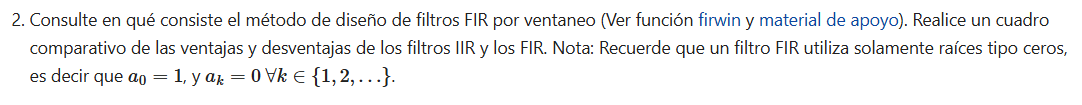

# **Filtros FIR vs IIR**

| **Característica**        | **Filtros FIR**                                                                                     | **Filtros IIR**                                                                                      |
|---------------------------|-----------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------------|
| **Estabilidad**           | Siempre estables, ya que no tienen polos fuera del círculo unitario.                                | Pueden ser inestables si los polos se encuentran fuera del círculo unitario.                         |
| **Respuesta al impulso**  | Finita, se apaga después de un tiempo determinado.                                                  | Infinita, la respuesta puede continuar indefinidamente.                                              |
| **Fase**                  | Pueden diseñarse con fase lineal o cero distorsión de fase, lo cual es útil en audio y comunicaciones. | Generalmente no tienen fase lineal, lo que puede causar distorsión de fase en ciertas aplicaciones.   |
| **Complejidad computacional** | Suelen requerir un orden mayor para lograr una pendiente pronunciada, lo que aumenta el costo computacional. | Menor orden para lograr una respuesta en frecuencia similar, por lo tanto, son más eficientes computacionalmente. |
| **Memoria requerida**     | Necesitan mayor cantidad de coeficientes y memoria para su implementación.                           | Menor uso de memoria debido a la retroalimentación y menor cantidad de coeficientes necesarios.       |
| **Estructura matemática** | Solo tienen ceros (no tienen polos), lo que simplifica su análisis y diseño.                         | Tienen tanto ceros como polos, lo que permite una mayor flexibilidad en el modelado de sistemas.      |
| **Estabilidad numérica**  | Más robustos frente a errores de redondeo en aritmética de punto fijo.                              | Menos robustos numéricamente debido a la retroalimentación, especialmente en punto fijo.              |
| **Aplicaciones típicas**  | Áreas donde la fase lineal es crítica: procesamiento de audio, comunicaciones, sistemas de control. | Aplicaciones que requieren alta selectividad de frecuencia con menor orden, como filtrado analógico digitalizado. |
| **Facilidad de diseño**   | El diseño es generalmente más simple y directo, especialmente con el método de ventaneo.             | El diseño puede ser más complejo, ya que puede involucrar técnicas de transformación de filtros analógicos. |
| **Causalidad**            | Siempre se pueden implementar de forma causal.                                                       | También pueden implementarse de forma causal, pero con más cuidado para evitar la inestabilidad.      |
| **Adaptabilidad**         | Más adecuados para filtros adaptativos debido a su estabilidad inherente.                           | Menos comunes en filtros adaptativos debido al riesgo de inestabilidad.                              |
| **Retardo de grupo**      | Tienen un retardo de grupo constante si se diseñan con fase lineal.                                  | El retardo de grupo no es constante, lo que puede causar distorsión en señales de banda ancha.        |


Los filtros FIR son preferibles cuando se necesita fase lineal y estabilidad garantizada, aunque a costa de mayor complejidad computacional.

Los filtros IIR son ideales para aplicaciones que requieren alta selectividad de frecuencia con menor orden del filtro, pero pueden ser inestables y tienen distorsión de fase.

#EJEMPLO

# **Filtro FIR Pasa Bajas (Método de Ventaneo con firwin)**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Parámetros del filtro FIR
num_taps = 51  # Número de coeficientes del filtro
cutoff_freq = 0.3  # Frecuencia de corte normalizada (0 a 1, siendo 1 la frecuencia de Nyquist)

# Diseño del filtro FIR usando la ventana de Hamming
fir_coeff = signal.firwin(num_taps, cutoff_freq, window='hamming')

# Respuesta en frecuencia
w, h = signal.freqz(fir_coeff)

# Visualización
plt.figure(figsize=(8, 4))
plt.plot(w / np.pi, 20 * np.log10(abs(h)), 'b')
plt.title('Filtro FIR Pasa Bajas (Ventana de Hamming)')
plt.xlabel('Frecuencia Normalizada (π rad/muestra)')
plt.ylabel('Magnitud (dB)')
plt.grid()
plt.show()


**Ventana de Hamming:** Suaviza las transiciones de la respuesta en frecuencia, reduciendo el rizado en la banda de paso y mejorando la atenuación en la banda de rechazo.

**Aplicación:** Ideal para situaciones donde se requiere fase lineal, como en procesamiento de audio y comunicaciones digitales.

# **Diferencias con los Filtros IIR:**

**Estabilidad:** Siempre estable, ya que no tiene retroalimentación.

**Fase lineal:** Perfecto para aplicaciones sensibles a la fase.

**Desventaja:** Requiere un orden más alto para obtener transiciones abruptas, aumentando la complejidad computacional.

# **Filtro FIR Pasa Banda**

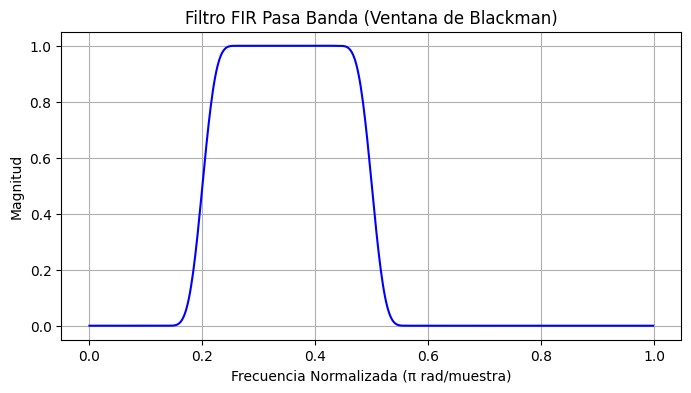

In [ ]:
# Parámetros del filtro FIR pasa banda
num_taps = 101
pass_band = [0.2, 0.5]  # Banda de paso normalizada

# Diseño del filtro FIR pasa banda
fir_coeff = signal.firwin(num_taps, pass_band, pass_zero=False, window='blackman')

# Respuesta en frecuencia
w, h = signal.freqz(fir_coeff)

# Visualización
plt.figure(figsize=(8, 4))
plt.plot(w / np.pi, abs(h), 'b')
plt.title('Filtro FIR Pasa Banda (Ventana de Blackman)')
plt.xlabel('Frecuencia Normalizada (π rad/muestra)')
plt.ylabel('Magnitud')
plt.grid()
plt.show()


**Ventana de Blackman:** Proporciona una mayor atenuación en la banda de rechazo a costa de un mayor ancho de transición.

**Aplicación:** Útil en sistemas de comunicación donde se necesita aislar una banda de frecuencia específica.

# **Diferencias con los Filtros IIR:**

**Control de la fase:** La ventana de Blackman ayuda a minimizar los efectos de la distorsión de fase.

**Estructura:** Solo tiene ceros, simplificando el diseño pero aumentando el orden necesario.

#**Filtro IIR Pasa Bajas (Butterworth)**

In [ ]:
# Parámetros del filtro IIR Butterworth
order = 4  # Orden del filtro
cutoff_freq = 0.3  # Frecuencia de corte normalizada

# Diseño del filtro Butterworth pasa bajas
b, a = signal.butter(order, cutoff_freq, btype='low')

# Respuesta en frecuencia
w, h = signal.freqz(b, a)

# Visualización
plt.figure(figsize=(8, 4))
plt.plot(w / np.pi, 20 * np.log10(abs(h)), 'g')
plt.title('Filtro IIR Pasa Bajas (Butterworth)')
plt.xlabel('Frecuencia Normalizada (π rad/muestra)')
plt.ylabel('Magnitud (dB)')
plt.grid()
plt.show()


**Filtro Butterworth:** Se caracteriza por tener una respuesta en frecuencia lo más plana posible en la banda de paso.

**Aplicación:** Ideal para sistemas donde se necesita una respuesta suave sin ondulaciones, como en señales biológicas o sistemas de control.

# **Diferencias con los Filtros FIR:**

**Orden más bajo:** Para una pendiente similar, el filtro IIR requiere un orden mucho menor.

**Posible inestabilidad:** Si los polos no están dentro del círculo unitario.
Retardo de grupo no constante: Puede introducir distorsión en señales de banda ancha.


# **Filtro IIR Pasa Banda (Chebyshev Tipo I)**

In [ ]:
# Parámetros del filtro IIR Chebyshev
order = 4
pass_band = [0.2, 0.5]  # Banda de paso normalizada
ripple = 1  # Ondulación en la banda de paso (dB)

# Diseño del filtro Chebyshev I pasa banda
b, a = signal.cheby1(order, ripple, pass_band, btype='band')

# Respuesta en frecuencia
w, h = signal.freqz(b, a)

# Visualización
plt.figure(figsize=(8, 4))
plt.plot(w / np.pi, abs(h), 'g')
plt.title('Filtro IIR Pasa Banda (Chebyshev I)')
plt.xlabel('Frecuencia Normalizada (π rad/muestra)')
plt.ylabel('Magnitud')
plt.grid()
plt.show()


**Filtro Chebyshev Tipo I:** Ofrece una mayor selectividad de frecuencia a costa de una ondulación controlada en la banda de paso.

**Aplicación:** Adecuado para sistemas donde se necesita una alta selectividad de frecuencia, como en radiofrecuencia o telecomunicaciones.

# **Diferencias con los Filtros FIR:**

**Mayor selectividad:** Comparado con los FIR, los IIR logran transiciones más rápidas con menor orden.

**Riesgo de inestabilidad:** Especialmente al aumentar la ondulación en la banda de paso.


